In [37]:
import numpy as np
from TO_sim.gen_Distribution import *
from TO_sim.Kuramoto_model import *
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

# Sample of Lorentizan distribution

In [35]:
N = 100_000
theta , omega, Kc = Lorentzian(N,0,1)
print(f"Kc = {Kc}")

Kc = 2.0


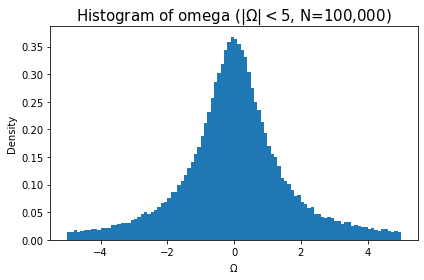

In [34]:
plt.hist(omega[np.where(np.abs(omega)<5)], bins = 100,density=True);
plt.title("Histogram of omega ($|\Omega|<5$, N=100,000)",fontsize=15)
plt.xlabel("$\Omega$")
plt.ylabel("Density")
plt.tight_layout()
# plt.savefig("Review/Histogram of g.png",dpi=400)

## Theta gif

In [ ]:
N = 1000
theta,omega,Kc = Lorentzian(N,0,1)

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap

In [2]:
theta_s,dtheta_s,rs,t = Sol_Kuramoto_mf(500,3,1,(0,100),distribution="Lorentzian")

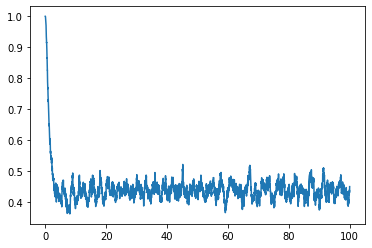

In [2]:
rs, t = Sol_r_Kuramoto_mf_C(3,500,1,(0,100),distribution="Lorentzian",seed=100)
plt.plot(t,rs)

In [27]:
rs = []
rsc = []
dk = 0.2
N, m = 10000,2
Ks = np.arange(0,12+dk,dk)
dist = "Lorentzian"
for S in parmap.map(Sol_r_Kuramoto_mf,Ks,N,m,(0,100),distribution = dist,seed=0,pm_pbar=True, pm_processes=16):
    r,t = S
    rs.append(r)
    
for S in parmap.map(Sol_r_Kuramoto_mf_C,Ks,N,m,(0,100),distribution = dist,pm_pbar=True,seed=0, pm_processes=16):
    r,t = S
    rsc.append(r)

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

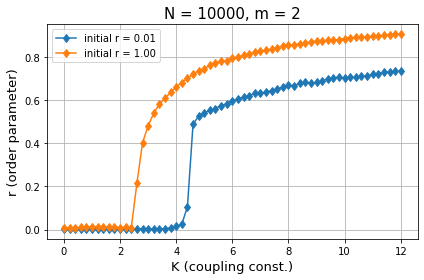

In [28]:
# plt.figure(figsize=(4.8,4.8))
plt.plot(Ks,np.mean(np.asarray(rs)[:,-1:],axis=1),'-d',label =f"initial r = {rs[0][0]:.02f}")
plt.plot(Ks,np.mean(np.asarray(rsc)[:,-1:],axis=1),'-d',label =f"initial r = {rsc[0][0]:.02f}")
plt.legend()
plt.title(f"N = {N}, m = {m}",fontsize=15)
plt.xlabel("K (coupling const.)",fontsize=13)
plt.ylabel("r (order parameter)",fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig(f"Review/N = {N},m = {m}, {dist} dk = {dk} final phase.png",dpi=400)

In [57]:
len(t)

10001

In [65]:
round(19.1/3,1)

6.4

In [9]:
theta_s[-1].shape

(500,)

In [90]:
np.arange(value,value + mul*11,mul)


array([2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4, 1.3, 1.2, 1.1, 1. ])

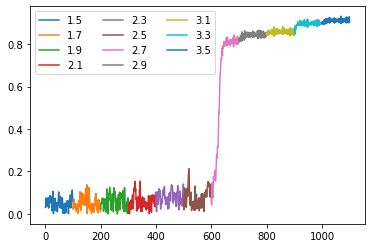

In [117]:
value = 1.5
mul =+0.2
N  =  500
theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
# theta_init = np.ones(N)
dtheta_init = np.zeros(N)
t_end = 100

Ks = np.arange(value,value + mul*11,mul)

theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,Ks[0],1,(0,t_end),p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution="Normal")

theta_s1,dtheta_s1,omega1,rs1,t1 = Sol_Kuramoto_mf(N,Ks[1],1,(0,t_end),p_theta=theta_s[-1],p_dtheta=dtheta_s[-1],p_omega=omega,distribution="Normal")
t1 += t[-1]

theta_s2,dtheta_s2,omega2,rs2,t2 = Sol_Kuramoto_mf(N,Ks[2],1,(0,t_end),p_theta=theta_s1[-1],p_dtheta=dtheta_s1[-1],p_omega=omega1,distribution="Normal")
t2 += t1[-1]

theta_s3,dtheta_s3,omega3,rs3,t3 = Sol_Kuramoto_mf(N,Ks[3],1,(0,t_end),p_theta=theta_s2[-1],p_dtheta=dtheta_s2[-1],p_omega=omega2,distribution="Normal")
t3 += t2[-1]

theta_s4,dtheta_s4,omega4,rs4,t4 = Sol_Kuramoto_mf(N,Ks[4],1,(0,t_end),p_theta=theta_s3[-1],p_dtheta=dtheta_s3[-1],p_omega=omega3,distribution="Normal")
t4 += t3[-1]

theta_s5,dtheta_s5,omega5,rs5,t5 = Sol_Kuramoto_mf(N,Ks[5],1,(0,t_end),p_theta=theta_s4[-1],p_dtheta=dtheta_s4[-1],p_omega=omega4,distribution="Normal")
t5 += t4[-1]

theta_s6,dtheta_s6,omega6,rs6,t6 = Sol_Kuramoto_mf(N,Ks[6],1,(0,t_end),p_theta=theta_s5[-1],p_dtheta=dtheta_s5[-1],p_omega=omega5,distribution="Normal")
t6 += t5[-1]

theta_s7,dtheta_s7,omega7,rs7,t7 = Sol_Kuramoto_mf(N,Ks[7],1,(0,t_end),p_theta=theta_s6[-1],p_dtheta=dtheta_s6[-1],p_omega=omega6,distribution="Normal")
t7 += t6[-1]

theta_s8,dtheta_s8,omega8,rs8,t8 = Sol_Kuramoto_mf(N,Ks[8],1,(0,t_end),p_theta=theta_s7[-1],p_dtheta=dtheta_s7[-1],p_omega=omega7,distribution="Normal")
t8 += t7[-1]

theta_s9,dtheta_s9,omega9,rs9,t9 = Sol_Kuramoto_mf(N,Ks[9],1,(0,t_end),p_theta=theta_s8[-1],p_dtheta=dtheta_s8[-1],p_omega=omega8,distribution="Normal")
t9 += t8[-1]

theta_s10,dtheta_s10,omega10,rs10,t10 = Sol_Kuramoto_mf(N,Ks[10],1,(0,t_end),p_theta=theta_s9[-1],p_dtheta=dtheta_s9[-1],p_omega=omega9,distribution="Normal")
t10 += t9[-1]

plt.plot(t,rs,t1,rs1,t2,rs2,t3,rs3,t4,rs4,t5,rs5,t6,rs6,t7,rs7,t8,rs8,t9,rs9,t10,rs10);
plt.legend(np.round(Ks,3),ncol =3)


(1100.0, 0.0)

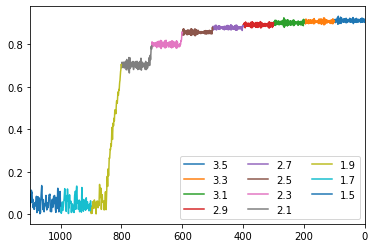

In [123]:
value = 3.5
mul =-0.2
N  =  500
# theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
# theta_init = np.ones(N)
# dtheta_init = np.zeros(N)
t_end = 100

Ksr = np.arange(value,value + mul*11,mul)

theta_sr,dtheta_sr,omega,rsr,tr = Sol_Kuramoto_mf(N,Ksr[0],1,(0,t_end),p_theta=theta_s10[-1],p_dtheta=dtheta_s10[-1],p_omega=omega10,distribution="Normal")

theta_sr1,dtheta_sr1,omega1,rsr1,tr1 = Sol_Kuramoto_mf(N,Ksr[1],1,(0,t_end),p_theta=theta_sr[-1],p_dtheta=dtheta_sr[-1],p_omega=omega,distribution="Normal")
tr1 += tr[-1]

theta_sr2,dtheta_sr2,omega2,rsr2,tr2 = Sol_Kuramoto_mf(N,Ksr[2],1,(0,t_end),p_theta=theta_sr1[-1],p_dtheta=dtheta_sr1[-1],p_omega=omega1,distribution="Normal")
tr2 += tr1[-1]

theta_sr3,dtheta_sr3,omega3,rsr3,tr3 = Sol_Kuramoto_mf(N,Ksr[3],1,(0,t_end),p_theta=theta_sr2[-1],p_dtheta=dtheta_sr2[-1],p_omega=omega2,distribution="Normal")
tr3 += tr2[-1]

theta_sr4,dtheta_sr4,omega4,rsr4,tr4 = Sol_Kuramoto_mf(N,Ksr[4],1,(0,t_end),p_theta=theta_sr3[-1],p_dtheta=dtheta_sr3[-1],p_omega=omega3,distribution="Normal")
tr4 += tr3[-1]

theta_sr5,dtheta_sr5,omega5,rsr5,tr5 = Sol_Kuramoto_mf(N,Ksr[5],1,(0,t_end),p_theta=theta_sr4[-1],p_dtheta=dtheta_sr4[-1],p_omega=omega4,distribution="Normal")
tr5 += tr4[-1]

theta_sr6,dtheta_sr6,omega6,rsr6,tr6 = Sol_Kuramoto_mf(N,Ksr[6],1,(0,t_end),p_theta=theta_sr5[-1],p_dtheta=dtheta_sr5[-1],p_omega=omega5,distribution="Normal")
tr6 += tr5[-1]

theta_sr7,dtheta_sr7,omega7,rsr7,tr7 = Sol_Kuramoto_mf(N,Ksr[7],1,(0,t_end),p_theta=theta_sr6[-1],p_dtheta=dtheta_sr6[-1],p_omega=omega6,distribution="Normal")
tr7 += tr6[-1]

theta_sr8,dtheta_sr8,omega8,rsr8,tr8 = Sol_Kuramoto_mf(N,Ksr[8],1,(0,t_end),p_theta=theta_sr7[-1],p_dtheta=dtheta_sr7[-1],p_omega=omega7,distribution="Normal")
tr8 += tr7[-1]

theta_sr9,dtheta_sr9,omega9,rsr9,tr9 = Sol_Kuramoto_mf(N,Ksr[9],1,(0,t_end),p_theta=theta_sr8[-1],p_dtheta=dtheta_sr8[-1],p_omega=omega8,distribution="Normal")
tr9 += tr8[-1]

theta_sr10,dtheta_sr10,omega10,rsr10,tr10 = Sol_Kuramoto_mf(N,Ksr[10],1,(0,t_end),p_theta=theta_sr9[-1],p_dtheta=dtheta_sr9[-1],p_omega=omega9,distribution="Normal")
tr10 += tr9[-1]


#plt.plot(np.r_[tr,tr1,tr2,tr3,tr4,tr5,tr6,tr7,tr8,tr9,tr10][::-1],np.r_[rsr,rsr1,rsr2,rsr3,rsr4,rsr5,rsr6,rsr7,rsr8,rsr9,rsr10][::-1])

plt.plot(tr,rsr,tr1,rsr1,tr2,rsr2,tr3,rsr3,tr4,rsr4,tr5,rsr5,tr6,rsr6,tr7,rsr7,tr8,rsr8,tr9,rsr9,tr10,rsr10);
plt.legend(np.round(Ksr,3),ncol =3)
plt.xlim([1100,0])

## with out m

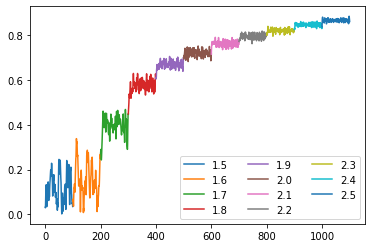

In [124]:
value = 1.5
mul =+0.1
N  =  500
m = 0
theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
# theta_init = np.ones(N)
dtheta_init = np.zeros(N)
t_end = 100

Ks = np.arange(value,value + mul*11,mul)

theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,Ks[0],m,(0,t_end),p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution="Normal")

theta_s1,dtheta_s1,omega1,rs1,t1 = Sol_Kuramoto_mf(N,Ks[1],m,(0,t_end),p_theta=theta_s[-1],p_dtheta=dtheta_s[-1],p_omega=omega,distribution="Normal")
t1 += t[-1]

theta_s2,dtheta_s2,omega2,rs2,t2 = Sol_Kuramoto_mf(N,Ks[2],m,(0,t_end),p_theta=theta_s1[-1],p_dtheta=dtheta_s1[-1],p_omega=omega1,distribution="Normal")
t2 += t1[-1]

theta_s3,dtheta_s3,omega3,rs3,t3 = Sol_Kuramoto_mf(N,Ks[3],m,(0,t_end),p_theta=theta_s2[-1],p_dtheta=dtheta_s2[-1],p_omega=omega2,distribution="Normal")
t3 += t2[-1]

theta_s4,dtheta_s4,omega4,rs4,t4 = Sol_Kuramoto_mf(N,Ks[4],m,(0,t_end),p_theta=theta_s3[-1],p_dtheta=dtheta_s3[-1],p_omega=omega3,distribution="Normal")
t4 += t3[-1]

theta_s5,dtheta_s5,omega5,rs5,t5 = Sol_Kuramoto_mf(N,Ks[5],m,(0,t_end),p_theta=theta_s4[-1],p_dtheta=dtheta_s4[-1],p_omega=omega4,distribution="Normal")
t5 += t4[-1]

theta_s6,dtheta_s6,omega6,rs6,t6 = Sol_Kuramoto_mf(N,Ks[6],m,(0,t_end),p_theta=theta_s5[-1],p_dtheta=dtheta_s5[-1],p_omega=omega5,distribution="Normal")
t6 += t5[-1]

theta_s7,dtheta_s7,omega7,rs7,t7 = Sol_Kuramoto_mf(N,Ks[7],m,(0,t_end),p_theta=theta_s6[-1],p_dtheta=dtheta_s6[-1],p_omega=omega6,distribution="Normal")
t7 += t6[-1]

theta_s8,dtheta_s8,omega8,rs8,t8 = Sol_Kuramoto_mf(N,Ks[8],m,(0,t_end),p_theta=theta_s7[-1],p_dtheta=dtheta_s7[-1],p_omega=omega7,distribution="Normal")
t8 += t7[-1]

theta_s9,dtheta_s9,omega9,rs9,t9 = Sol_Kuramoto_mf(N,Ks[9],m,(0,t_end),p_theta=theta_s8[-1],p_dtheta=dtheta_s8[-1],p_omega=omega8,distribution="Normal")
t9 += t8[-1]

theta_s10,dtheta_s10,omega10,rs10,t10 = Sol_Kuramoto_mf(N,Ks[10],m,(0,t_end),p_theta=theta_s9[-1],p_dtheta=dtheta_s9[-1],p_omega=omega9,distribution="Normal")
t10 += t9[-1]

plt.plot(t,rs,t1,rs1,t2,rs2,t3,rs3,t4,rs4,t5,rs5,t6,rs6,t7,rs7,t8,rs8,t9,rs9,t10,rs10);
plt.legend(np.round(Ks,3),ncol =3)


(1100.0, 0.0)

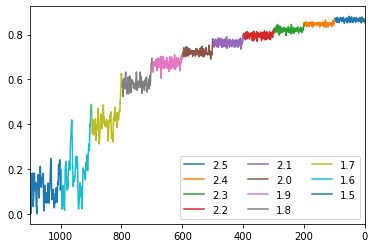

In [125]:
value = 2.5
mul =-0.1
N  =  500
# theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
# theta_init = np.ones(N)
# dtheta_init = np.zeros(N)
t_end = 100

Ksr = np.arange(value,value + mul*11,mul)

theta_sr,dtheta_sr,omega,rsr,tr = Sol_Kuramoto_mf(N,Ksr[0],m,(0,t_end),p_theta=theta_s10[-1],p_dtheta=dtheta_s10[-1],p_omega=omega10,distribution="Normal")

theta_sr1,dtheta_sr1,omega1,rsr1,tr1 = Sol_Kuramoto_mf(N,Ksr[1],m,(0,t_end),p_theta=theta_sr[-1],p_dtheta=dtheta_sr[-1],p_omega=omega,distribution="Normal")
tr1 += tr[-1]

theta_sr2,dtheta_sr2,omega2,rsr2,tr2 = Sol_Kuramoto_mf(N,Ksr[2],m,(0,t_end),p_theta=theta_sr1[-1],p_dtheta=dtheta_sr1[-1],p_omega=omega1,distribution="Normal")
tr2 += tr1[-1]

theta_sr3,dtheta_sr3,omega3,rsr3,tr3 = Sol_Kuramoto_mf(N,Ksr[3],m,(0,t_end),p_theta=theta_sr2[-1],p_dtheta=dtheta_sr2[-1],p_omega=omega2,distribution="Normal")
tr3 += tr2[-1]

theta_sr4,dtheta_sr4,omega4,rsr4,tr4 = Sol_Kuramoto_mf(N,Ksr[4],m,(0,t_end),p_theta=theta_sr3[-1],p_dtheta=dtheta_sr3[-1],p_omega=omega3,distribution="Normal")
tr4 += tr3[-1]

theta_sr5,dtheta_sr5,omega5,rsr5,tr5 = Sol_Kuramoto_mf(N,Ksr[5],m,(0,t_end),p_theta=theta_sr4[-1],p_dtheta=dtheta_sr4[-1],p_omega=omega4,distribution="Normal")
tr5 += tr4[-1]

theta_sr6,dtheta_sr6,omega6,rsr6,tr6 = Sol_Kuramoto_mf(N,Ksr[6],m,(0,t_end),p_theta=theta_sr5[-1],p_dtheta=dtheta_sr5[-1],p_omega=omega5,distribution="Normal")
tr6 += tr5[-1]

theta_sr7,dtheta_sr7,omega7,rsr7,tr7 = Sol_Kuramoto_mf(N,Ksr[7],m,(0,t_end),p_theta=theta_sr6[-1],p_dtheta=dtheta_sr6[-1],p_omega=omega6,distribution="Normal")
tr7 += tr6[-1]

theta_sr8,dtheta_sr8,omega8,rsr8,tr8 = Sol_Kuramoto_mf(N,Ksr[8],m,(0,t_end),p_theta=theta_sr7[-1],p_dtheta=dtheta_sr7[-1],p_omega=omega7,distribution="Normal")
tr8 += tr7[-1]

theta_sr9,dtheta_sr9,omega9,rsr9,tr9 = Sol_Kuramoto_mf(N,Ksr[9],m,(0,t_end),p_theta=theta_sr8[-1],p_dtheta=dtheta_sr8[-1],p_omega=omega8,distribution="Normal")
tr9 += tr8[-1]

theta_sr10,dtheta_sr10,omega10,rsr10,tr10 = Sol_Kuramoto_mf(N,Ksr[10],m,(0,t_end),p_theta=theta_sr9[-1],p_dtheta=dtheta_sr9[-1],p_omega=omega9,distribution="Normal")
tr10 += tr9[-1]


# plt.plot(np.r_[t,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10],np.r_[rs,rs1,rs2,rs3,rs4,rs5,rs6,rs7,rs8,rs9,rs10])
plt.plot(tr,rsr,tr1,rsr1,tr2,rsr2,tr3,rsr3,tr4,rsr4,tr5,rsr5,tr6,rsr6,tr7,rsr7,tr8,rsr8,tr9,rsr9,tr10,rsr10);
plt.legend(np.round(Ksr,3),ncol =3)
plt.xlim([1100,0])

In [21]:
np.r_[rs,100+rs2]

array([2.38641246e-02, 2.38642941e-02, 2.38648010e-02, ...,
       1.00029778e+02, 1.00029900e+02, 1.00030016e+02])

In [69]:
type(None)

NoneType

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
from tqdm import tqdm_notebook

In [3]:
N  =  500
K_start = 0.1
K_end = 12.1
dK = 0.2
Ks = np.arange(K_start,K_end + dK,dK)
m = 0.0
dtheta_init = np.zeros(N)
t_end = 1000
dist = "Lorentzian" 
if dist == "Normal":
    theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
else:
    theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    
theta_dic = {}
dtheta_dic = {}
rs_dic = {}
omega_dic = {}
t_dic = {}

num = 0
for K in tqdm_notebook(Ks):
    if num == 0:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution="Normal")
    else:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],p_omega=omega_dic[num-1],distribution="Normal")
    theta_dic[num] = theta_s
    dtheta_dic[num] = dtheta_s
    rs_dic[num] = rs
    omega_dic[num] = omega
    t_dic[num] = t + num*t_end
    num += 1

C:\Users\kim9y\AppData\Local\Temp\ipykernel_33924\2871232403.py:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for K in tqdm_notebook(Ks):


  0%|          | 0/61 [00:00<?, ?it/s]

In [12]:
theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

theta_r_dic = {}
dtheta_r_dic = {}
rs_r_dic = {}
omega_r_dic = {}
t_r_dic = {}
dKr = -0.2
Ksr = np.arange(K_end,K_start + dKr,dKr)

num_r = 0
for K in tqdm_notebook(Ksr):
    if num_r == 0:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
    else:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_r_dic[num_r-1][-1],p_omega=omega_r_dic[num_r-1],distribution=dist)
    theta_r_dic[num_r] = theta_s
    dtheta_r_dic[num_r] = dtheta_s
    rs_r_dic[num_r] = rs
    omega_r_dic[num_r] = omega
    t_r_dic[num_r] = t + num_r*t_end
    num_r += 1

C:\Users\kim9y\AppData\Local\Temp\ipykernel_33924\3604375102.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for K in tqdm_notebook(Ksr):


  0%|          | 0/61 [00:00<?, ?it/s]

In [13]:
# np.save(f'N = {N}, {dist}/time, m = {m}, forward time.npz',[*t_dic.values()])
# np.save(f'N = {N}, {dist}/rs m = {m}, forward time.npz',[*rs_dic.values()])
# np.save(f'N = {N}, {dist}/time, m = {m}, backward time.npz',[*t_r_dic.values()])
# np.save(f'N = {N}, {dist}/rs m = {m}, backward time.npz',[*rs_r_dic.values()])

np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},time, m = {m}, forward time.npz',[*t_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},rs m = {m}, forward time.npz',[*rs_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},time, m = {m}, backward time.npz',[*t_r_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},rs m = {m}, backward time.npz',[*rs_r_dic.values()])

# np.save('N, forward time.npz'[*t_dic.values()])

In [14]:
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},theta, m = {m}, forward time.npz',[*theta_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},dtheta, m = {m}, forward time.npz',[*dtheta_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},theta, m = {m}, backward time.npz',[*theta_r_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},dtheta, m = {m}, backward time.npz',[*dtheta_r_dic.values()])

KeyboardInterrupt: 

In [246]:
t_end*len(Ks)


61000

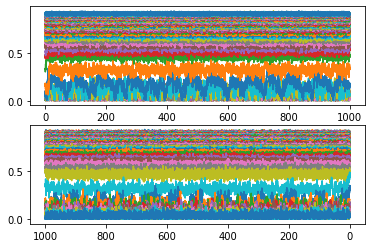

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    ax1.plot(t_,r_temp)
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    ax2.plot(t_,r_temp)
ax2.invert_xaxis()

In [16]:
int_ =np.linspace(0.0,1,len(Ks))
color = plt.cm.viridis_r(int_)

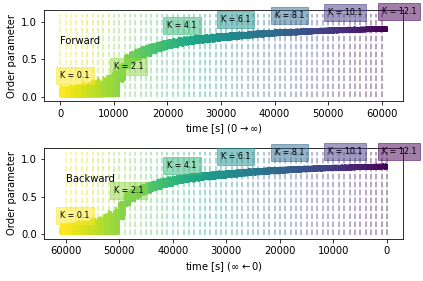

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
num = 0
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    ax1.plot(t_temp,r_temp,color = color[num],label=f"{Ks[num]:.02f}")
    ax1.vlines(t_temp[0],-0.01,1.1,alpha=0.5,linestyles='--',color=color[num])
    if num%10==0:
        text_ = ax1.text(t_temp[0],r_temp[-1]+0.2,f"K = {Ks[num]:.01f}",fontsize=8)
        text_.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
    num +=1
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    num -=1
    ax2.vlines(t_temp[0],-0.01,1.1,alpha=0.5,linestyles='--',color=color[num])
    if num%10==0:
        text_ = ax2.text(t_temp[-1],r_temp[0]+0.2,f"K = {Ks[num]:.01f}",fontsize=8)
        text_.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
    ax2.plot(t_temp,r_temp,color = color[num])
ax2.invert_xaxis()
ax1.set_ylabel("Order parameter")
ax2.set_ylabel("Order parameter")
ax1.set_xlabel(r"time [s] ($0 \rightarrow \infty$)")
ax2.set_xlabel("time [s] ($\infty \leftarrow 0$)")
# ax1.legend(ncol=6,fontsize=3,loc='center left', bbox_to_anchor=(1, 0))
# plt.colorbar()
ax1.text(0,0.7,"Forward")
ax2.text(60_000,0.7,"Backward")
plt.tight_layout()
plt.savefig(f'Review/m = {m},Forward,Backward Full time.png',dpi=400)

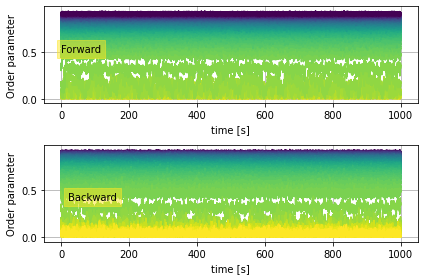

In [25]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
num = 0
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    # if num ==15:
    ax1.plot(t_,r_temp,color = color[num],label=f"K = {Ks[num]:.02f}")
    num +=1
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    num -=1
    # if num ==12:
    ax2.plot(t_,r_temp,color = color[num],label=f"K = {Ks[num]:.02f}")
ax1.set_ylabel("Order parameter")
ax2.set_ylabel("Order parameter")
ax1.set_xlabel(r"time [s]")
ax2.set_xlabel("time [s]")
# ax1.legend(ncol=6,fontsize=3,loc='center left', bbox_to_anchor=(1, 0))
# plt.colorbar()
text_1 = ax1.text(0,0.5,"Forward")
text_1.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
text_2 = ax2.text(20,0.4,"Backward")
text_2.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
ax1.grid()
ax2.grid()
# ax1.legend(loc=4)
# ax2.legend(loc=0)
plt.tight_layout()
plt.savefig(f'Review/m={m},Forward,Backward each time special.png',dpi=400)
# ax2.invert_xaxis()

In [20]:
r_last = []
r_r_last = []
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    r_last.append(np.mean(r_temp[-5000:]))
    
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    r_r_last.append(np.mean(r_temp[-5000:]))
    

In [120]:
8.63/(6.44/4.8)

6.432298136645962

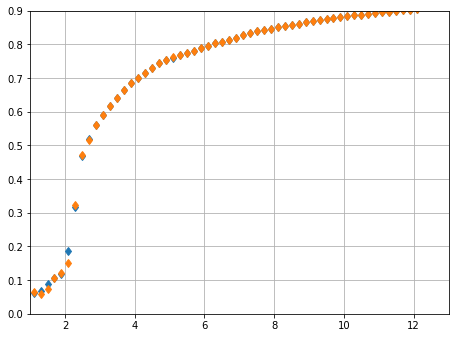

In [21]:
plt.figure(figsize=(6.43,4.8))
plt.plot(Ks,r_last,'d',markersize=6)
plt.plot(Ksr,r_r_last,'d',markersize=6)
plt.grid()
plt.ylim(0,0.9)
plt.xlim(1,13)
plt.tight_layout()
# plt.savefig("temp.png",transparent=True,dpi = 500)


In [23]:
dk = 0.2

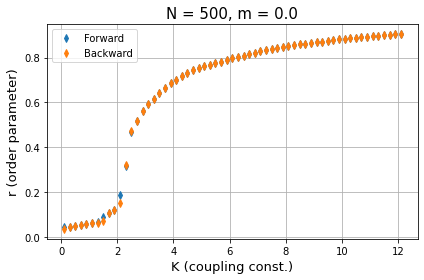

In [24]:
# plt.figure(figsize=(4.8,4.8))
plt.plot(Ks,r_last,'d',markersize=5,label="Forward")
plt.plot(Ksr,r_r_last,'d',markersize=5,label="Backward")

plt.legend()
plt.title(f"N = {N}, m = {m}",fontsize=15)
plt.xlabel("K (coupling const.)",fontsize=13)
plt.ylabel("r (order parameter)",fontsize=13)
plt.grid()
plt.tight_layout()
plt.savefig(f"Review/N = {N},m = {m}, {dist} dk = {dk} 50s .png",dpi=400)

In [250]:
N_ = range(1,500+1)
d = 1
Omega_ =[d*np.tan(np.pi/2 * (2*i - N - 1)/(N+1)) for i in N_]

In [256]:
Omega__ = scs.cauchy.rvs(0,1,500)

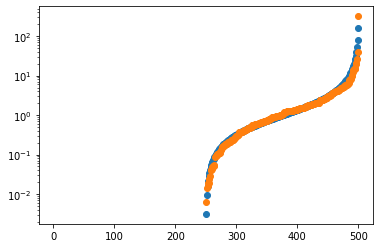

In [263]:
plt.scatter(N_,Omega_)
plt.scatter(N_,sorted(Omega__))
# plt.xscale('log')
plt.yscale('log')

In [255]:
Omega__

array([500.])

# Omega distribution using quantile function

In [5]:
Quantile_Lorentzian = lambda x,d,N : np.array([d*np.tan(np.pi/2 * (2*i - N - 1)/(N+1)) + x for i in range(1,N+1)])

In [54]:
Omega_Q = Quantile_Lorentzian(0,1,50000)
Omega_R = scs.cauchy.rvs(0,1,50000)

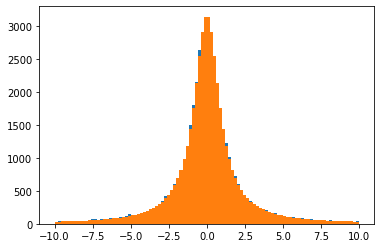

In [57]:
plt.hist(Omega_R[np.where(abs(Omega_R)<10)],bins=100);
plt.hist(Omega_Q[np.where(abs(Omega_Q)<10)],bins=100);

In [64]:
print(max(Omega_Q),min(Omega_Q))
print(max(Omega_R),min(Omega_R))

15915.81259812351 -15915.81259812351
7304.168095799193 -43976.66974667597


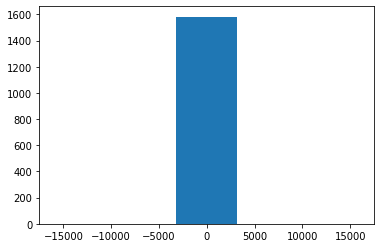

In [73]:
# plt.hist(Omega_R[np.where(abs(Omega_R)>10)],bins=10);
plt.hist(Omega_Q[np.where(abs(Omega_Q)>10)],bins=10);

In [3]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import parmap
import numpy as np
# from tqdm import tqdm_notebook
from tqdm.notebook import tqdm

In [79]:
N  =  500
K_start = 0.1
K_end = 12.5
dK = 0.2
Ks = np.arange(K_start,K_end + dK,dK)
m = 2
dtheta_init = np.zeros(N)
t_end = 2000
dt = 0.1
dist = "Quantile Lorentzian" 
if dist == "Normal":
    theta_init,omega_init, Kc = Normal(N,0,1,seed=0)
elif dist == "Lorentzian":
    theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
elif dist == "Quantile Lorentzian":
    theta_init,omega_init, Kc = Lorentzian(N,0,1,seed=0)
    omega_init = Quantile_Lorentzian(0,1,N)
    
theta_dic = {}
dtheta_dic = {}
rs_dic = {}
omega_dic = {}
t_dic = {}

num = 0
for K in tqdm(Ks):
    if num == 0:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution="Normal")
    else:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_dic[num-1][-1],p_omega=omega_dic[num-1],distribution="Normal")
        # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_dic[num-1][-1],p_dtheta=dtheta_init,p_omega=omega_dic[num-1],distribution="Normal")
    theta_dic[num] = theta_s
    dtheta_dic[num] = dtheta_s
    rs_dic[num] = rs
    omega_dic[num] = omega
    t_dic[num] = t + num*t_end
    num += 1

  0%|          | 0/63 [00:00<?, ?it/s]

In [81]:
theta_r_init,dtheta_r_init = theta_dic[num-1][-1],dtheta_dic[num-1][-1]

theta_r_dic = {}
dtheta_r_dic = {}
rs_r_dic = {}
omega_r_dic = {}
t_r_dic = {}
dKr = -0.2
Ksr = np.arange(K_end,K_start + dKr,dKr)

num_r = 0
for K in tqdm(Ksr):
    if num_r == 0:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_r_init,p_omega=omega_init,distribution=dist)
        # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_init,p_dtheta=dtheta_init,p_omega=omega_init,distribution=dist)
    else:
        theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_r_dic[num_r-1][-1]+np.random.uniform(),p_omega=omega_r_dic[num_r-1],distribution=dist)
        # theta_s,dtheta_s,omega,rs,t = Sol_Kuramoto_mf(N,K,m,(0,t_end),dt=dt,p_theta=theta_r_dic[num_r-1][-1],p_dtheta=dtheta_init,p_omega=omega_r_dic[num_r-1],distribution=dist)
    theta_r_dic[num_r] = theta_s
    dtheta_r_dic[num_r] = dtheta_s
    rs_r_dic[num_r] = rs
    omega_r_dic[num_r] = omega
    t_r_dic[num_r] = t + num_r*t_end
    num_r += 1

  0%|          | 0/63 [00:00<?, ?it/s]

In [ ]:
# np.save(f'N = {N}, {dist}/time, m = {m}, forward time.npz',[*t_dic.values()])
# np.save(f'N = {N}, {dist}/rs m = {m}, forward time.npz',[*rs_dic.values()])
# np.save(f'N = {N}, {dist}/time, m = {m}, backward time.npz',[*t_r_dic.values()])
# np.save(f'N = {N}, {dist}/rs m = {m}, backward time.npz',[*rs_r_dic.values()])

np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},time, m = {m}, forward time.npz',[*t_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},rs m = {m}, forward time.npz',[*rs_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},time, m = {m}, backward time.npz',[*t_r_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},rs m = {m}, backward time.npz',[*rs_r_dic.values()])

# np.save('N, forward time.npz'[*t_dic.values()])

In [9]:
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},theta, m = {m}, forward time.npz',[*theta_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},dtheta, m = {m}, forward time.npz',[*dtheta_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},theta, m = {m}, backward time.npz',[*theta_r_dic.values()])
np.save(f'N = {N}, {dist}/Endtime = {t_end*len(Ks)},dtheta, m = {m}, backward time.npz',[*dtheta_r_dic.values()])

(array([488.,   2.,   4.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([3.20442003e-01, 1.02358404e+08, 2.04716808e+08, 3.07075212e+08,
        4.09433617e+08, 5.11792021e+08, 6.14150425e+08, 7.16508829e+08,
        8.18867233e+08, 9.21225637e+08, 1.02358404e+09, 1.12594244e+09,
        1.22830085e+09, 1.33065925e+09, 1.43301766e+09, 1.53537606e+09,
        1.63773447e+09, 1.7400

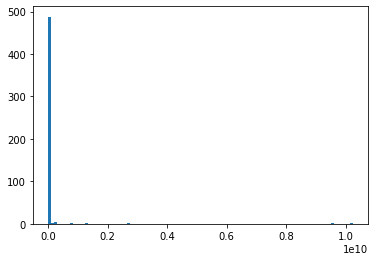

In [93]:
plt.hist(omega*theta_r_dic[num_r-1][-1]*(1+(2*np.random.rand(N)-1)),bins=100)

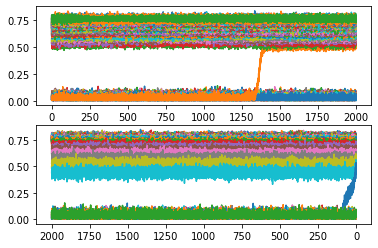

In [82]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    ax1.plot(t_,r_temp)
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    ax2.plot(t_,r_temp)
ax2.invert_xaxis()

In [83]:
int_ =np.linspace(0.0,1,len(Ks))
color = plt.cm.viridis_r(int_)

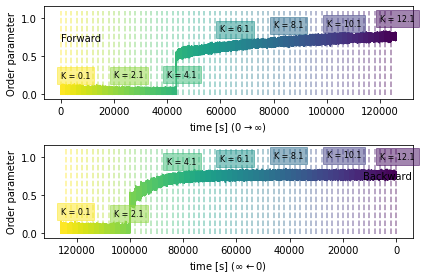

In [85]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
num = 0
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    ax1.plot(t_temp,r_temp,color = color[num],label=f"{Ks[num]:.02f}")
    ax1.vlines(t_temp[0],-0.01,1.1,alpha=0.5,linestyles='--',color=color[num])
    if num%10==0:
        text_ = ax1.text(t_temp[0],r_temp[-1]+0.2,f"K = {Ks[num]:.01f}",fontsize=8)
        text_.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
    num +=1
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    num -=1
    ax2.vlines(t_temp[0],-0.01,1.1,alpha=0.5,linestyles='--',color=color[num])
    if num%10==0:
        text_ = ax2.text(t_temp[-1],r_temp[0]+0.2,f"K = {Ks[num]:.01f}",fontsize=8)
        text_.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
    ax2.plot(t_temp,r_temp,color = color[num])
ax2.invert_xaxis()
ax1.set_ylabel("Order parameter")
ax2.set_ylabel("Order parameter")
ax1.set_xlabel(r"time [s] ($0 \rightarrow \infty$)")
ax2.set_xlabel("time [s] ($\infty \leftarrow 0$)")
# ax1.legend(ncol=6,fontsize=3,loc='center left', bbox_to_anchor=(1, 0))
# plt.colorbar()
ax1.text(0,0.7,"Forward")
ax2.text(12_600,0.7,"Backward")
plt.tight_layout()
plt.savefig(f'Review/m = {m},Forward,Backward Full time {dist}.png',dpi=400)

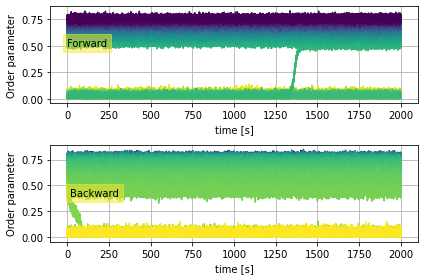

In [86]:
fig, (ax1,ax2) = plt.subplots(2,1)
t_ = t_dic[0]
num = 0
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    # if num ==15:
    ax1.plot(t_,r_temp,color = color[num],label=f"K = {Ks[num]:.02f}")
    num +=1
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    num -=1
    # if num ==12:
    ax2.plot(t_,r_temp,color = color[num],label=f"K = {Ks[num]:.02f}")
ax1.set_ylabel("Order parameter")
ax2.set_ylabel("Order parameter")
ax1.set_xlabel(r"time [s]")
ax2.set_xlabel("time [s]")
# ax1.legend(ncol=6,fontsize=3,loc='center left', bbox_to_anchor=(1, 0))
# plt.colorbar()
text_1 = ax1.text(0,0.5,"Forward")
text_1.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
text_2 = ax2.text(20,0.4,"Backward")
text_2.set_bbox(dict(facecolor=color[num], alpha=0.5, edgecolor=color[num]))
ax1.grid()
ax2.grid()
# ax1.legend(loc=4)
# ax2.legend(loc=0)
plt.tight_layout()
plt.savefig(f'Review/m={m},Forward,Backward each time {dist}.png',dpi=400)        
# ax2.invert_xaxis()

In [87]:
r_last = []
r_r_last = []
for t_temp, r_temp in zip([*t_dic.values()],[*rs_dic.values()]):
    r_last.append(np.mean(r_temp[-500:]))
    
    
for t_temp, r_temp in zip([*t_r_dic.values()],[*rs_r_dic.values()]):
    r_r_last.append(np.mean(r_temp[-500:]))
    

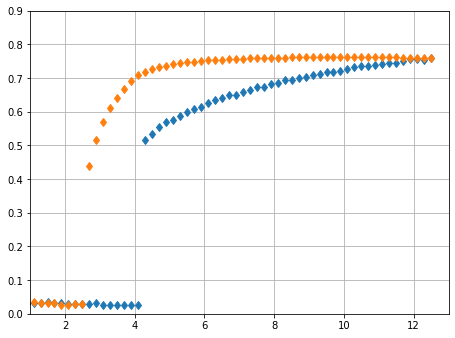

In [88]:
plt.figure(figsize=(6.43,4.8))
plt.plot(Ks,r_last,'d',markersize=6)
plt.plot(Ksr,r_r_last,'d',markersize=6)
plt.grid()
plt.ylim(0,0.9)
plt.xlim(1,13)
plt.tight_layout()
plt.savefig(f"review/m = {m} k vs r {dist}.png",transparent=True,dpi = 500)
